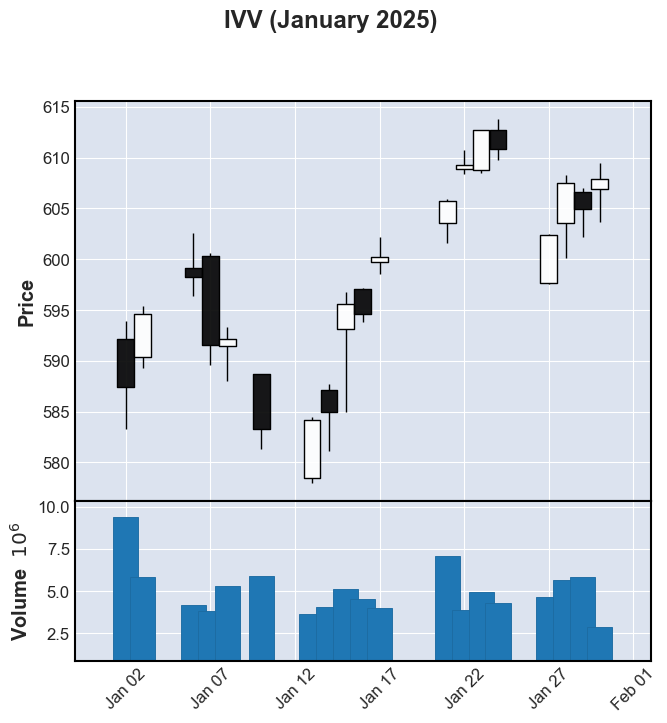

In [4]:

# Part A: Import libraries
import pandas as pd
import yfinance as yf
import mplfinance as mpf

# Define the start and end date for the data you want to retrieve
start_date = "2025-01-01"
end_date = "2025-01-31"

# Retrieve stock price data for graph
df = yf.Ticker("IVV").history(start = start_date, end = end_date)

# Add title for graph
title = "IVV (January 2025)"

# Use mplfinance to plot data as a candlestick chart
mpf.plot(df, 
         type = "candle", 
         volume = True, 
         title = title, 
         show_nontrading = True, 
         figsize = (8,8))

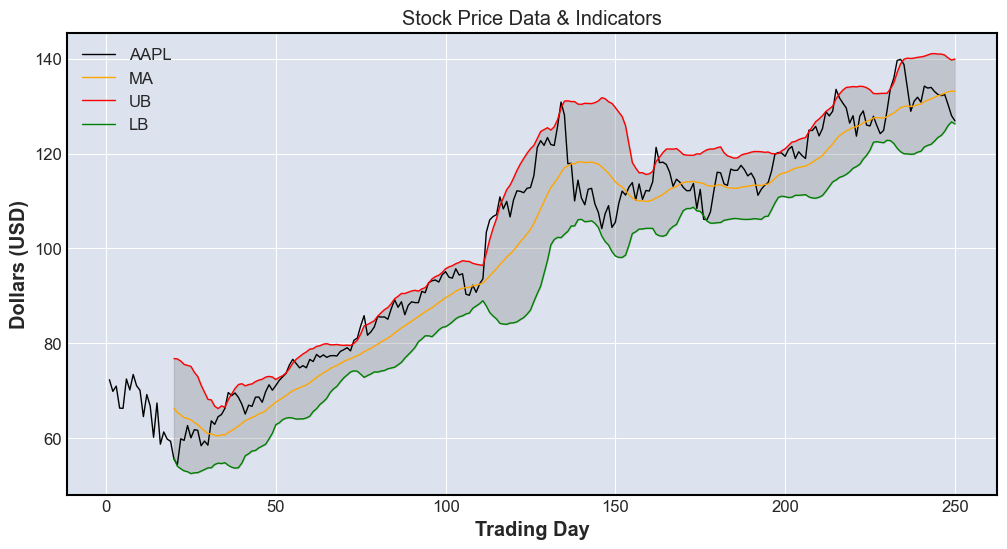

In [10]:
# Part B: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define function to calculate Bollinger Bands
def calculate_bollinger_bands(df, column='AAPL', window=20):
    # Calculate moving average and standard deviation
    moving_avg = df[column].rolling(window=window).mean()
    std_dev = df[column].rolling(window=window).std(ddof=0)
    
    # Calculate upper and lower bands
    upper_band = moving_avg + 2 * std_dev
    lower_band = moving_avg - 2 * std_dev
    
    return moving_avg, upper_band, lower_band

# Read the StockData file
df = pd.read_csv('StockData.csv')

# Sort  data by 'Trading Day'
df = df.sort_values(by='Trading Day')

# Select the first 250 rows of the dataframe
df = df.iloc[:250]

# Calculate the Bollinger Bands (MA, Upper Band, Lower Band)
df['MA'], df['UB'], df['LB'] = calculate_bollinger_bands(df)

# Plot the data
plt.figure(figsize=(12, 6))

# Plot the AAPL stock price
plt.plot(df['Trading Day'], df['AAPL'], label='AAPL', color='black', linewidth=1)

# Plot the moving average, upper bound, and lower bound
plt.plot(df['Trading Day'], df['MA'], label='MA', color='orange', linewidth=1)
plt.plot(df['Trading Day'], df['UB'], label='UB', color='red', linewidth=1)
plt.plot(df['Trading Day'], df['LB'], label='LB', color='green', linewidth=1)

# Shade the area between the upper and lower bounds
plt.fill_between(df['Trading Day'], df['LB'], df['UB'], color='gray', alpha=0.3)

# Add labels and title
plt.xlabel('Trading Day')
plt.ylabel('Dollars (USD)')
plt.title('Stock Price Data & Indicators')

# Show the legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
